In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings(action='ignore')


import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-notebook')
from yellowbrick.regressor import ResidualsPlot

import statsmodels.api as sm
from statsmodels.api import OLS

from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OrdinalEncoder, OneHotEncoder

In [2]:
# specify index_col=0 to avoid creating an "Unnamed: 0" column.
# specify parse date to avoid object dtype for dates
df = pd.read_csv('./data/kc_house_data.csv') 
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
len(df)

21597

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Fill NaNs and Drop Duplicates

### Duplicates

In [5]:
df['id'].duplicated().sum()

177

In [6]:
df.drop_duplicates(subset=['id'])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


### NaNs

In [7]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
view_count = print(df['view'].value_counts())

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64


In [9]:
df['view'].fillna('NONE', inplace=True)

In [10]:
waterfront_count = print(df['waterfront'].value_counts())

NO     19075
YES      146
Name: waterfront, dtype: int64


In [11]:
df['waterfront'].fillna('NO', inplace=True)

In [12]:
yr_renovated_count = print(df['yr_renovated'].value_counts())

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64


In [13]:
df['yr_renovated'].fillna(0, inplace=True)

In [14]:
df.drop(['date', 'id'], axis=1, inplace=True)

# Helper Functions

ohe executes 2 transformations, test and train. data for any given input variable: First, we use OneHotEncoder to split up our categorical variables. Second, we run a linear regression on encoded values using .fit(). Then, it takes in a training df ('df'), a test df ('df2') and a column name. Next, it returns the training df and the test df concatenated with newly encoded columns. Lastly, we return a list of these newly encoded column names. 

In [15]:
def ohe(df, df2, column):
    for col in column:
        train = df[[col]]
        ohe = OneHotEncoder(drop='first', sparse=False, handle_unknown="ignore")
        ohe.fit(train)
        encoded_train = ohe.transform(train)
        col_labels = [f"{col}_{f}" for f in ohe.get_feature_names()]
        encoded_train = pd.DataFrame(encoded_train, columns=col_labels, index=df.index)
        df = pd.concat([df, encoded_train], axis=1)
        
        test = df2[[col]]
        encoded_test = ohe.transform(test)
        col_labels = [f"{col}_{f}" for f in ohe.get_feature_names()]
        encoded_test = pd.DataFrame(encoded_test, columns=col_labels, index=df2.index)
        df2 = pd.concat([df2, encoded_test], axis=1)
        
    return df, df2, encoded_train.columns.tolist()

We run a Standard Scaler to scale all the values in the test data and training data so that our models results are in comparable units. Then, we score the scaled data to get the R2 to assess the strength of our model.

In [16]:
def scale_score(x, y, x2, y2):
    scaler = StandardScaler()
    scaler.fit(x)
    X_train_scaled = scaler.transform(x)
    X_test_scaled = scaler.transform(x2)

    lr = LinearRegression()
    lr.fit(X_train_scaled,y_train)

    train_preds = lr.predict(X_train_scaled)
    test_preds = lr.predict(X_test_scaled)
    
    print(f"""training score: {r2_score(y_train, train_preds)}
    test score: {r2_score(y_test, test_preds)}""")
    
    return X_train_scaled, X_test_scaled, train_preds, test_preds

Uses price and predictions to calculate Mean Absolute Error (MAE), Mean Squared Error (MSE) and Root Mean Squared Error (RSME) for the training and testing data sets. We will compare these values to evaluate model performance.

In [17]:
def get_train_test_metrics(y_train, train_preds,
               y_test, test_preds):
    """
    Prints different training and testing metrics, namely R2, MAE, MSE, RMSE
    """
    print("\nTraining Metrics:")
    print(f"R2: {r2_score(y_train, train_preds):.3f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_train, train_preds):.3f}")
    print(f"Mean Squared Error: {mean_squared_error(y_train, train_preds):.3f}")
    print(f"Root Mean Squared Error: {mean_squared_error(y_train, train_preds, squared=False):.3f}")
    
    print("\nTesting Metrics:")
    print(f"R2: {r2_score(y_test, test_preds):.3f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, test_preds):.3f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, test_preds):.3f}")
    print(f"Root Mean Squared Error: {mean_squared_error(y_test, test_preds, squared=False):.3f}")

# Outliers

### Price

In [18]:
# calculate 25, 75, iqr, whiskers for 'price'
price_q75, price_q25 = np.percentile(df['price'], [75, 25])
price_iqr = price_q75 - price_q25
price_min = price_q25 - (1.5 * price_iqr)
price_max = price_q75 + (1.5 * price_iqr)

print(f"""price_min: {price_min} 
price_max: {price_max}""")

price_min: -162500.0 
price_max: 1129500.0


In [19]:
df = df[df['price'] >= price_min]
df = df[df['price'] <= price_max]

### Grade

In [20]:
grade_count = print(df['grade'].value_counts())

7 Average        8962
8 Good           5943
9 Better         2319
6 Low Average    2037
10 Very Good      766
5 Fair            242
11 Excellent      137
4 Low              27
12 Luxury           5
3 Poor              1
Name: grade, dtype: int64


In [21]:
df = df[df['grade'] != '3 Poor']
df = df[df['grade'] != '12 Luxury']

# Train Test Split

In [22]:
y = df['price']
X = df.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

# Categorical Variables

### Bedroom

In [23]:
bed_count = df['bedrooms'].value_counts()
bed_count

3     9596
4     6302
2     2736
5     1333
6      225
1      194
7       30
8        9
9        4
10       2
11       1
33       1
Name: bedrooms, dtype: int64

In [24]:
#drop the 33 bedroom outlier 
df = df[df['bedrooms'] != 33]
df = df[df['bedrooms'] != 11]
df = df[df['bedrooms'] != 10]
#df = df[df['bedrooms'] != 9]
#df = df[df['bedrooms'] != 8]
#df = df[df['bedrooms'] != 7]

### Condition

In [25]:
condition_count = df['condition'].value_counts()
condition_count

Average      13263
Good          5412
Very Good     1558
Fair           168
Poor            28
Name: condition, dtype: int64

In [26]:
X_train, X_test, encoded_condition = ohe(X_train, X_test, ['condition'])

In [27]:
X_train['condition'] = X_train['condition'].map({'Very Good': 5, 'Good': 4, 'Average': 3, 'Fair': 2, 'Poor': 1})

In [28]:
X_test['condition'] = X_test['condition'].map({'Very Good': 5, 'Good': 4, 'Average': 3, 'Fair': 2, 'Poor': 1})

In [29]:
#df['condition'] = df['condition'].cat.reorder_categories(['Poor', 'Fair', 'Average', 'Good', 'Very Good'])

In [30]:
#df['condition'] = df['condition'].astype('category')

In [31]:
#df['condition'].cat.codes

In [32]:
#condition = df[['condition']]

In [33]:
#condition_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good'] 

In [34]:
#condition_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good'] 
#ode = OrdinalEncoder(categories=[condition_list])
#ode.fit(condition)

In [35]:
#ord_cond = pd.DataFrame(ode.transform(condition), columns=condition.columns)

In [36]:
#df['condition_ord'] = ord_cond

### Grade

In [37]:
grade_count = print(df['grade'].value_counts())

7 Average        8958
8 Good           5943
9 Better         2319
6 Low Average    2037
10 Very Good      766
5 Fair            242
11 Excellent      137
4 Low              27
Name: grade, dtype: int64


In [38]:
X_train, X_test, encoded_grade = ohe(X_train, X_test, ['grade'])

In [39]:
#X_train, X_test, ord_grade = ode(X_train, X_test, ['grade'])

### Floors

In [40]:
floor_count = print(df['floors'].value_counts())

1.0    10436
2.0     7479
1.5     1828
3.0      570
2.5      110
3.5        6
Name: floors, dtype: int64


In [41]:
X_train, X_test, encoded_floors = ohe(X_train, X_test, ['floors'])

In [42]:
#X_train['floors'] = X_train['floors'].map({1.0: 1, 1.5: 1, 2.0: 2, 2.5: 2, 3.0: 3, 3.5: 3, 4.0: 4})

In [43]:
#X_test['floors'] = X_test['floors'].map({1.0: 1, 1.5: 1, 2.0: 2, 2.5: 2, 3.0: 3, 3.5: 3, 4.0: 4})

### View

In [44]:
X_train['view'].isna().sum()

0

In [45]:
view_count = df['view'].value_counts()
view_count

NONE         18859
AVERAGE        804
GOOD           347
FAIR           274
EXCELLENT      145
Name: view, dtype: int64

In [46]:
X_train['view'].fillna('NONE', inplace=True)
X_test['view'].fillna('NONE', inplace=True)

In [47]:
X_train, X_test, encoded_view = ohe(X_train, X_test, ['view'])

In [48]:
X_train['view'] = X_train['view'].map({'EXCELLENT': 5, 'GOOD': 4, 'AVERAGE': 3, 'FAIR': 2, 'NONE': 1})

In [49]:
X_test['view'] = X_test['view'].map({'EXCELLENT': 5, 'GOOD': 4, 'AVERAGE': 3, 'FAIR': 2, 'NONE': 1})

### Waterfront

In [50]:
waterfront_count = print(df['waterfront'].value_counts())

NO     20378
YES       51
Name: waterfront, dtype: int64


In [51]:
X_train, X_test, encoded_waterfront = ohe(X_train, X_test, ['waterfront'])

In [52]:
X_train['waterfront'] = X_train['waterfront'].map({'NO': 0, 'YES': 1})

In [53]:
X_test['waterfront'] = X_test['waterfront'].map({'NO': 0, 'YES': 1})

### Zipcode

In [54]:
zipcode_count = print(df['zipcode'].sort_values().value_counts())

98103    587
98038    586
98052    563
98115    558
98042    547
        ... 
98102     88
98109     86
98024     73
98148     57
98039      6
Name: zipcode, Length: 70, dtype: int64


In [55]:
X_train, X_test, encoded_zipcode = ohe(X_train, X_test, ['zipcode'])

# Mutlitcollinearity

In [56]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.301195,0.454385,0.620917,0.093421,0.273238,0.529086,0.060893,0.081802,-0.018027,0.431294,0.072038,0.561366,0.082159
bedrooms,0.301195,1.000000,0.505787,0.602817,0.025823,0.160233,0.479232,0.168882,0.000290,-0.153899,-0.032907,0.146817,0.384861,0.023063
bathrooms,0.454385,0.505787,1.000000,0.716027,0.064783,0.502837,0.637711,0.545189,0.023364,-0.206867,-0.008972,0.248961,0.528498,0.064850
sqft_living,0.620917,0.602817,0.716027,1.000000,0.159063,0.340421,0.852842,0.354158,0.019137,-0.204104,0.011106,0.286876,0.737984,0.172988
sqft_lot,0.093421,0.025823,0.064783,0.159063,1.000000,-0.017092,0.162746,0.042344,0.007370,-0.129864,-0.094727,0.222306,0.143186,0.709190
floors,0.273238,0.160233,0.502837,0.340421,-0.017092,1.000000,0.529161,0.512063,-0.003744,-0.064674,0.036310,0.135835,0.268484,-0.021340
sqft_above,0.529086,0.479232,0.637711,0.852842,0.162746,0.529161,1.000000,0.462493,-0.002248,-0.270940,-0.044201,0.390694,0.717239,0.176013
yr_built,0.060893,0.168882,0.545189,0.354158,0.042344,0.512063,0.462493,1.000000,-0.196879,-0.343388,-0.154728,0.410044,0.363162,0.062039
yr_renovated,0.081802,0.000290,0.023364,0.019137,0.007370,-0.003744,-0.002248,-0.196879,1.000000,0.068665,0.023036,-0.059177,-0.034558,0.005620
zipcode,-0.018027,-0.153899,-0.206867,-0.204104,-0.129864,-0.064674,-0.270940,-0.343388,0.068665,1.000000,0.276198,-0.563850,-0.284042,-0.147493


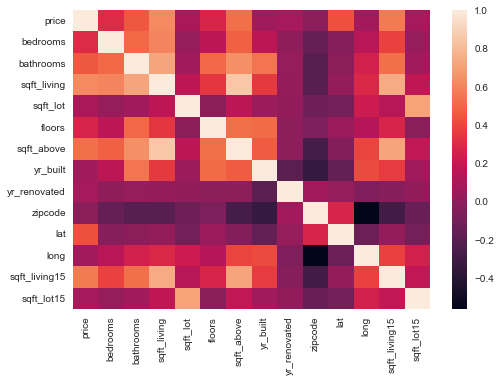

In [57]:
sns.heatmap(df.corr());

In [58]:
df.corr()['price'].abs().sort_values(ascending=False)

price            1.000000
sqft_living      0.620917
sqft_living15    0.561366
sqft_above       0.529086
bathrooms        0.454385
lat              0.431294
bedrooms         0.301195
floors           0.273238
sqft_lot         0.093421
sqft_lot15       0.082159
yr_renovated     0.081802
long             0.072038
yr_built         0.060893
zipcode          0.018027
Name: price, dtype: float64

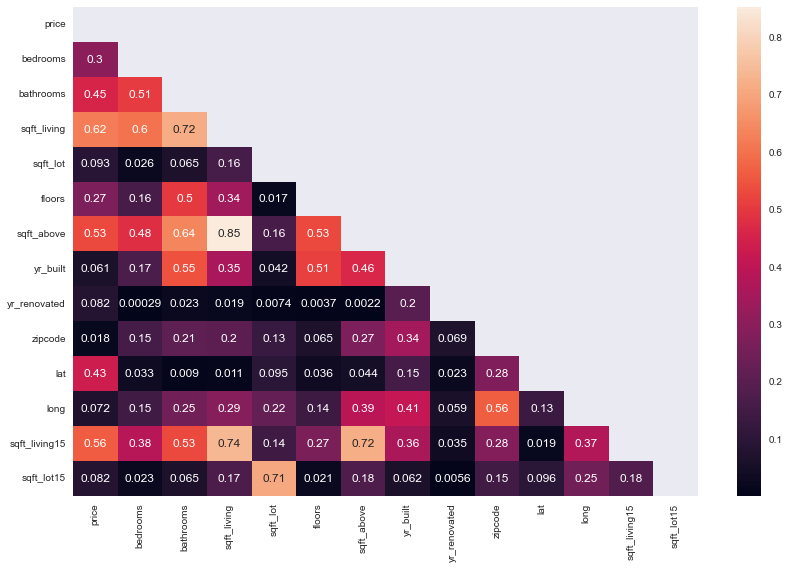

In [59]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(14, 9))
    
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))
    ax = sns.heatmap(abs(df.corr()),mask=mask,annot=True)
    fig.savefig('images/Corelation_Heatmap_22',bbox_inches="tight");

In [60]:
df.drop(['sqft_above', 'sqft_living15', 'sqft_lot', 'sqft_lot15'], axis=1, inplace=True)

# Models

In [61]:
dummy = DummyRegressor()
dummy.fit(X_train, y_train)
basemodel_dummy_score = dummy.score(X_train, y_train)
test_dummy_score = dummy.score(X_test, y_test)

print(f"""basemodel_dummy_score: {basemodel_dummy_score}

test_dummy_score: {test_dummy_score}""")

basemodel_dummy_score: 0.0

test_dummy_score: -6.76953825662352e-07


### Model 1

In [62]:
cols = ['sqft_living']

y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [63]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_score(x, y, x2, y2)

training score: 0.38991917757990846
    test score: 0.3719569549202053


In [64]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.390
Mean Absolute Error: 130910.843
Mean Squared Error: 26477478264.624
Root Mean Squared Error: 162719.016

Testing Metrics:
R2: 0.372
Mean Absolute Error: 131618.178
Mean Squared Error: 26557815557.122
Root Mean Squared Error: 162965.688


### Model 2

In [65]:
cols = encoded_zipcode

y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [66]:
X_train_scaled, X_test_scaled, train_preds, test_preds=scale_score(x, y, x2, y2)

training score: 0.4794539210972316
    test score: 0.48490694104359067


In [67]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.479
Mean Absolute Error: 113616.417
Mean Squared Error: 22591674714.851
Root Mean Squared Error: 150305.272

Testing Metrics:
R2: 0.485
Mean Absolute Error: 110499.090
Mean Squared Error: 21781542780.687
Root Mean Squared Error: 147585.713


### Model 3

In [68]:
cols = encoded_grade

y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [69]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_score(x, y, x2, y2)

training score: 0.4081763809004818
    test score: 0.39477183353892764


In [70]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.408
Mean Absolute Error: 126490.993
Mean Squared Error: 25685116521.182
Root Mean Squared Error: 160265.768

Testing Metrics:
R2: 0.395
Mean Absolute Error: 125935.505
Mean Squared Error: 25593051528.508
Root Mean Squared Error: 159978.285


### Model 4

In [71]:
cols = encoded_view

y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [72]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_score(x, y, x2, y2)

training score: 0.061913619354723504
    test score: 0.04866153141727547


In [73]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.062
Mean Absolute Error: 163159.728
Mean Squared Error: 40712903669.626
Root Mean Squared Error: 201774.388

Testing Metrics:
R2: 0.049
Mean Absolute Error: 161175.163
Mean Squared Error: 40228885231.593
Root Mean Squared Error: 200571.397


### Model 5

In [74]:
cols = encoded_waterfront

y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [75]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_score(x, y, x2, y2)

training score: 0.001791755442365206
    test score: 0.004084040537254419


In [76]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.002
Mean Absolute Error: 168862.699
Mean Squared Error: 43322189663.330
Root Mean Squared Error: 208139.832

Testing Metrics:
R2: 0.004
Mean Absolute Error: 165867.168
Mean Squared Error: 42113916504.633
Root Mean Squared Error: 205216.755


### Model 6

In [77]:
cols = encoded_grade + encoded_zipcode

y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [78]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_score(x, y, x2, y2)

training score: 0.7095247433229348
    test score: 0.7156031400228218


In [79]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.710
Mean Absolute Error: 82586.838
Mean Squared Error: 12606612128.159
Root Mean Squared Error: 112279.170

Testing Metrics:
R2: 0.716
Mean Absolute Error: 81138.467
Mean Squared Error: 12026181026.078
Root Mean Squared Error: 109663.946


### Model 7

In [80]:
cols = encoded_grade + encoded_view + encoded_zipcode

y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [81]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_score(x, y, x2, y2)

training score: 0.7349797970209856
    test score: 0.7336034764958378


In [82]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.735
Mean Absolute Error: 79404.179
Mean Squared Error: 11501864025.536
Root Mean Squared Error: 107246.744

Testing Metrics:
R2: 0.734
Mean Absolute Error: 78878.683
Mean Squared Error: 11265007696.062
Root Mean Squared Error: 106136.741


### Model 8

In [83]:
cols = ['sqft_living'] + encoded_grade + encoded_zipcode

y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [84]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_score(x, y, x2, y2)

training score: 0.7992309701818452
    test score: 0.8087553872026194


In [85]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.799
Mean Absolute Error: 67173.637
Mean Squared Error: 8713366209.632
Root Mean Squared Error: 93345.413

Testing Metrics:
R2: 0.809
Mean Absolute Error: 65508.488
Mean Squared Error: 8087087649.097
Root Mean Squared Error: 89928.236


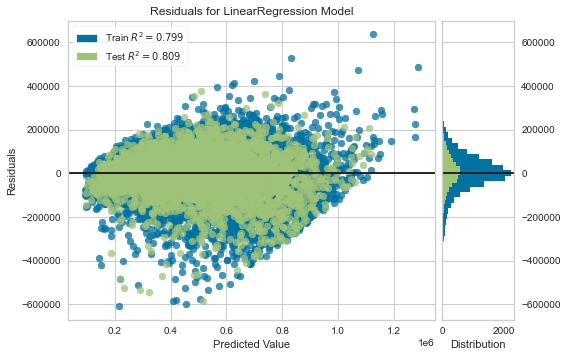

In [86]:
lr = LinearRegression()

visualizer = ResidualsPlot(lr)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()  
plt.show()

### Model 9

In [87]:
cols = ['sqft_living'] + encoded_grade + encoded_view + encoded_zipcode

y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [88]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_score(x, y, x2, y2)

training score: 0.8145123177667856
    test score: 0.8184777698361034


In [89]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.815
Mean Absolute Error: 64957.139
Mean Squared Error: 8050156461.571
Root Mean Squared Error: 89722.664

Testing Metrics:
R2: 0.818
Mean Absolute Error: 64064.448
Mean Squared Error: 7675960980.665
Root Mean Squared Error: 87612.562


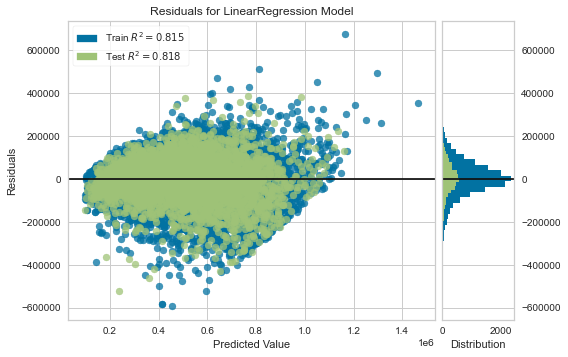

In [90]:
lr = LinearRegression()

visualizer = ResidualsPlot(lr)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()  
plt.show()

### Model 10

In [91]:
cols = ['sqft_living'] + encoded_grade + encoded_view + encoded_waterfront + encoded_zipcode

y = y_train
x = X_train.filter(cols, axis=1)

y2 = y_test
x2 = X_test.filter(cols, axis=1)

In [92]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_score(x, y, x2, y2)

training score: 0.8150078682601786
    test score: 0.8200857079887502


In [93]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.815
Mean Absolute Error: 64937.176
Mean Squared Error: 8028649594.061
Root Mean Squared Error: 89602.732

Testing Metrics:
R2: 0.820
Mean Absolute Error: 63873.393
Mean Squared Error: 7607966716.227
Root Mean Squared Error: 87223.659


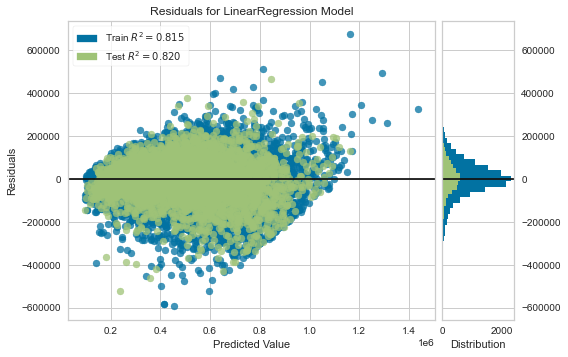

In [94]:
lr = LinearRegression()

visualizer = ResidualsPlot(lr)

visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()  
plt.show()

### Model 11

In [95]:
cols_over = ['bathrooms', 'bedrooms', 'floors', 'sqft_living', 'yr_built'] + encoded_zipcode + encoded_grade + encoded_view + encoded_waterfront

y = y_train
x = X_train.filter(cols_over, axis=1)

y2 = y_test
x2 = X_test.filter(cols_over, axis=1)

In [96]:
X_train_scaled, X_test_scaled, train_preds, test_preds = scale_score(x, y, x2, y2)

training score: 0.8210888543890182
    test score: 0.8255629438604213


In [97]:
get_train_test_metrics(y_train, train_preds, y_test, test_preds)


Training Metrics:
R2: 0.821
Mean Absolute Error: 64222.189
Mean Squared Error: 7764735089.398
Root Mean Squared Error: 88117.734

Testing Metrics:
R2: 0.826
Mean Absolute Error: 62927.410
Mean Squared Error: 7376352942.008
Root Mean Squared Error: 85885.697


# Visualizations

### Homes Sold by Zipcode

Download geoJSON with all the zipcodes in King County from [gis-kingcounty.opendata.arcgis.com](https://gis-kingcounty.opendata.arcgis.com/datasets/zipcodes-for-king-county-and-surrounding-area-shorelines-zipcode-shore-area/explore?location=47.503298%2C-121.477600%2C8.93)

In [98]:
import json
import geojson
from geojson import FeatureCollection, dump

with open('./data/Zipcodes_for_King_County_and_Surrounding_Area_(Shorelines)___zipcode_shore_area.geojson', 'r') as f:
    kcmap = json.load(f)

In [99]:
# explore geoJSON keys
kcmap.keys()

dict_keys(['type', 'name', 'crs', 'features'])

In [100]:
# note the keys and values; 'properties' has zipcodes
kcmap['features'][4]

{'type': 'Feature',
 'properties': {'OBJECTID': 5,
  'ZIP': 98005,
  'ZIPCODE': '98005',
  'COUNTY': '033',
  'ZIP_TYPE': 'Standard',
  'Shape_Length': 116930.3541309374,
  'Shape_Area': 211273337.58027354,
  'COUNTY_NAME': 'King County',
  'PREFERRED_CITY': 'BELLEVUE'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-122.15876244900666, 47.66064678238712],
    [-122.16407641552944, 47.660732623897495],
    [-122.1641794661331, 47.65770313243692],
    [-122.1642153249363, 47.65664665025667],
    [-122.16427974586392, 47.65476402444478],
    [-122.16432519628637, 47.65342848863274],
    [-122.16439725494905, 47.65136899213959],
    [-122.16457840705058, 47.646161602561484],
    [-122.16459333020681, 47.64616191340921],
    [-122.16646188266024, 47.64620011379997],
    [-122.16765650568387, 47.64622453266358],
    [-122.16914466666523, 47.646254925251085],
    [-122.16981003902191, 47.646268534726396],
    [-122.17230051974857, 47.64631577037875],
    [-122.1723079553757, 47.646315

geoJSON contains all zipcodes in king county. We can access integer type zipcodes via 'Feature' then 'ZIP'.

In [101]:
# Extract zipcodes list from geoJSON that matches the zips in the df
coordinates = []
for coords in kcmap['features']:
    if (int(coords['properties']['ZIP']) in df['zipcode'].unique()):
        coordinates.append(coords)
        
# Create new geoJSON using 'w' with extracted zipcodes
with open('./data/Filtered_King_County_Zipcodes', 'w') as f:
    dump(FeatureCollection(coordinates), f)

In [102]:
# Import folium for geospatial data visualization 
import folium 

# Run the new geoJSON
geojson_zips = f"./data/Filtered_King_County_Zipcodes"


# Create a dataframe using the zipcode column and then create a column with 0 value
zipcode_choropleth = pd.DataFrame(df.zipcode)
zipcode_choropleth['Homes_Sold_Count'] = 0 # Group by zipcode, then count and reset the index
zipcode_choropleth = zipcode_choropleth.groupby('zipcode').count().reset_index()


# Set the king county coordinates that folium will map onto
kc_coordinates = (47.4081, -121.9949)


# Create the folium map and set zoom
zipcodes_map = folium.Map(kc_coordinates, zoom_start=5)


# Specify map parameters
folium.Choropleth(
    geo_data=geojson_zips,
    name="choropleth",
    data=zipcode_choropleth,
    columns=["zipcode", "Homes_Sold_Count"],
    key_on="feature.properties.ZIP",
    fill_color="OrRd",
    fill_opacity=0.4,
    line_opacity=0.9,
    legend_name="Homes Sold",
    highlight=True).add_to(zipcodes_map)


# Set TileLayer; OpenStreetMap is default
folium.TileLayer('OpenStreetMap').add_to(zipcodes_map)
folium.LayerControl().add_to(zipcodes_map)

# Fit map boundaries
zipcodes_map.fit_bounds(zipcodes_map.get_bounds())
zipcodes_map.save('./maps/choropeth_zipcode_sales.html')

#zipcodes_map

In [103]:
# Divide 'price' into five parts, each containing a fifth (20%)
df['price_color'] = pd.qcut(df['price'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=['#8B8000',
                                    '#006400',
                                    '#00008B',
                                    '#8F40AB',
                                    '#8B0000'])

In [104]:
# Green Lake, zipcode 91803, had the most sales
# Set green lake coordinates
greenlake_coordinates = (47.6802, -122.3284)
pent_sales_map = folium.Map(location=greenlake_coordinates, tiles='stamentoner', zoom_start=12.5)

In [105]:
# property class produces a series that contains longitude and latitude
for property in df.iterrows():
    folium.Circle(location=[property[1].lat,property[1].long], # Circle function creates a CircleMarker
                  radius=1,
                  fill=True,
                  color=property[1].price_color, # and populates the map with each cicrle representing a 20% range
                  weight= 2,
                  opacity=0.9).add_to(pent_sales_map)

# Save map in html file
pent_sales_map.save('maps/pent_sales.html')

In [106]:
#       0 - 20%       20 - 40%       40 - 60%       60 - 80%       80 - 100%
#       Yellow         Green          BLue           Purple           Red

#pent_sales_map

In [107]:
# calculate mean sale price of homes in Greenlake and neighboring zipcodes
# compare it to the mean price of all homes sold in King Count
greenlake_avg = np.mean(df.loc[df.zipcode.isin([98103])].price)
greenlake_neighbor_avg = np.mean(df.loc[df.zipcode.isin([98103, 98117, 98107, 98115, 98105, 98195])].price)
kingcounty_avg = np.mean(df.price)

print(f"""Average price of homes sold in Green Lake {np.round(greenlake_avg)}

Average price of homes sold in zipcodes neighboring Green Lake: {np.round(greenlake_neighbor_avg, 2)}

Average price of all homes sold in King County: {np.round(kingcounty_avg, 2)}""")

Average price of homes sold in Green Lake 566694.0

Average price of homes sold in zipcodes neighboring Green Lake: 577573.62

Average price of all homes sold in King County: 476563.13


In [108]:
X_train['bathrooms'].groupby(X_train['zipcode_x0_98103']).value_counts()

zipcode_x0_98103  bathrooms
0.0               2.50         3795
                  1.00         2773
                  1.75         2211
                  2.25         1422
                  2.00         1373
                  1.50         1037
                  2.75          843
                  3.00          455
                  3.50          396
                  3.25          306
                  4.00           61
                  0.75           60
                  3.75           57
                  4.50           36
                  4.25           20
                  5.00            8
                  1.25            6
                  4.75            4
                  5.25            2
                  0.50            1
                  5.50            1
                  5.75            1
                  6.75            1
                  7.50            1
1.0               1.00          132
                  2.50           60
                  2.00           59


In [109]:
X_train['bedrooms'].groupby(X_train['zipcode_x0_98103']).value_counts()

zipcode_x0_98103  bedrooms
0.0               3           6997
                  4           4586
                  2           1948
                  5            997
                  6            164
                  1            144
                  7             22
                  8              7
                  9              2
                  10             2
                  11             1
1.0               3            220
                  2            130
                  4             70
                  5             15
                  1             12
                  6              5
                  7              1
                  9              1
Name: bedrooms, dtype: int64

In [110]:
X_train['grade'].groupby(X_train['zipcode_x0_98103']).value_counts()

zipcode_x0_98103  grade        
0.0               7 Average        6462
                  8 Good           4259
                  9 Better         1729
                  6 Low Average    1517
                  10 Very Good      573
                  5 Fair            191
                  11 Excellent      115
                  4 Low              24
1.0               7 Average         227
                  8 Good            173
                  6 Low Average      32
                  9 Better           17
                  5 Fair              4
                  11 Excellent        1
Name: grade, dtype: int64

In [111]:
np.median(X_train['sqft_living'])

1850.0

In [112]:
X_train['view'].groupby(X_train['zipcode_x0_98103']).value_counts()

zipcode_x0_98103  view
0.0               1       13709
                  3         586
                  4         255
                  2         217
                  5         103
1.0               1         426
                  3          19
                  4           6
                  5           3
Name: view, dtype: int64

In [113]:
X_train['waterfront'].groupby(X_train['zipcode_x0_98103']).value_counts()

zipcode_x0_98103  waterfront
0.0               0             14831
                  1                39
1.0               0               454
Name: waterfront, dtype: int64

In [114]:
X_train['zipcode'].value_counts()

98103    454
98038    432
98115    428
98042    422
98052    417
        ... 
98109     70
98102     64
98024     59
98148     44
98039      3
Name: zipcode, Length: 70, dtype: int64

In [115]:
common_home = pd.DataFrame(columns = X_train.columns)

for num in range(0, 1):
    common_home = common_home.append(pd.Series(0, index=common_home.columns), ignore_index=True)

In [116]:
#common_home['bathrooms'].replace(0, X_train['bathrooms'].value_counts().index[0], inplace=True)
#common_home['bedrooms'].replace(0, X_train['bedrooms'].value_counts().index[0], inplace=True)
common_home['grade'].replace(0, X_train['grade'].value_counts().index[0], inplace=True)
#common_home['floors'].replace(0, X_train['floors'].value_counts().index[0], inplace=True)
common_home['sqft_living'].replace(0, np.median(X_train['sqft_living']), inplace=True)
common_home['view'].replace(0, X_train['view'].value_counts().index[0], inplace=True)
common_home['waterfront'].replace(0, X_train['waterfront'].value_counts().index[1], inplace=True)
#common_home['yr_built'].replace(0, X_train['yr_built'].value_counts().index[0], inplace=True)
#common_home['yr_renovated'].replace(0, X_train['yr_built'].value_counts().index[0], inplace=True)
common_home['zipcode'].replace(0, X_train['zipcode'].value_counts().index[0], inplace=True)

#common_home['zipcode_x0_98103'].replace(0, 1, inplace=True)


In [117]:
common_home[cols]

,sqft_living,grade_x0_11 Excellent,grade_x0_4 Low,grade_x0_5 Fair,grade_x0_6 Low Average,grade_x0_7 Average,grade_x0_8 Good,grade_x0_9 Better,view_x0_EXCELLENT,view_x0_FAIR,...,zipcode_x0_98146,zipcode_x0_98148,zipcode_x0_98155,zipcode_x0_98166,zipcode_x0_98168,zipcode_x0_98177,zipcode_x0_98178,zipcode_x0_98188,zipcode_x0_98198,zipcode_x0_98199
0,1850.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
lr.fit(X_train.filter(cols, axis=1), y_train)

LinearRegression()

In [119]:
prediction = lr.predict(common_home[cols])[0]

In [120]:
common_home_pred = (prediction - (88467.472/2), prediction + (88467.472/2))
np.round(common_home_pred, 0)

array([440671., 529139.])

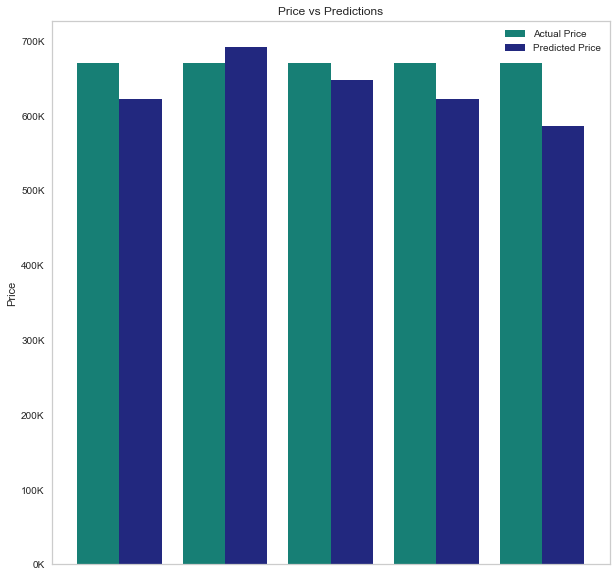

In [121]:
vis_data = y_test.to_frame()
vis_data['prediction'] = test_preds
vis_data.sort_values(by='price', ascending=False)[925:930]
y = np.arange(5)
h = 0.6

fig, ax = plt.subplots(figsize=(10,10))


ax.set_title(f'Price vs Predictions')
ax.set_ylabel('Price')
ax.get_xaxis().set_visible(False)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
ax.bar(y-h/3, vis_data.sort_values(by='price', ascending=False)[925:930]['price'], h/1.5, color='#177F75')
ax.bar(y+h/3, vis_data.sort_values(by='price', ascending=False)[925:930]['prediction'], h/1.5, color='#22287F')

ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
ax.set_yticklabels(ylabels)

ax.legend(['Actual Price', 'Predicted Price']);
ax.grid(False)

fig.savefig('./images/price_vs_preds.jpg',
            transparent = False,bbox_inches="tight");